# Data Analysis and Mining - PCA

## Objectives 
- Perform Principal Component Analysis.
- Perform Single Value Decomposition.

## Initialization

### Import libraries

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_style("darkgrid")

### Load data

### Data cleaning

Start by loading the entire dataset.

In [49]:
# Specify the path to the dataset CSV file
dataset_path = "../../Dataset/dataset.csv"

# Read the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


First, we drop columns that we do not need. In addition, we add one more column which represents the percentage of win games, as it is one of the most interesting features.

In [50]:
# Drop columns 'TEAM', 'CONF', 'POSTSEASON'
df = df.drop(['TEAM', 'CONF', 'POSTSEASON'], axis=1)

Check the size of the dataset.

In [51]:
df.shape

(1757, 21)

We decided to analyze a subset of the whole dataset. Since our dataset is a collection of data which belongs to 5 different seasons, we filter the dataset by only keeping and analyzing the information related to one year.

In [52]:
# Filter by year, keep only data from selected year
df = df[df['YEAR'] == 2015]

Check the size of the dataset.

In [53]:
df.shape

(351, 21)

## Analysis

### Choice of the variables

Including both offensive and defensive metrics ensures a balanced representation of team performance. ADJOE (expected score out of 100 actions) and ADJDE (opponents' expected score out of 100 actions) capture overall team efficiency, and adding both of them will let us understand if defending is more important than attacking, or viceversa.

At the same time, we decided to take into consideration 2P_O and 3P_O, in order to find out about the importance of 3-points goals compared to 2-points goals, and viceversa.

And, finally, in addition to 2P_O and 3P_O, we added 2P_D and 3P_D, for the same reason which was mentioned about the choice made for ADJOE and ADJDE.

Overall, our choice should comprehend easily-interpretable features which are expected to provide interesting insides about the importance of attacking and defending.

### Principal Component Analysis

In [54]:
# Take from df the columns 'ADJOE', 'ADJDE', '2P_O', '2P_D', '3P_O' and '3P_D'
df = df[['ADJOE', 'ADJDE', '2P_O', '2P_D', '3P_O', '3P_D']]

# Normalize data by Range
df = (df - df.min()) / (df.max() - df.min())

df.head()

(       ADJOE     ADJDE      2P_O      2P_D      3P_O      3P_D
 1   1.000000  0.266667  0.828283  0.372340  0.597884  0.787879
 5   0.925573  0.183333  0.883838  0.457447  0.714286  0.325758
 10  0.624046  0.094444  0.505051  0.297872  0.291005  0.242424
 11  0.927481  0.405556  1.000000  0.515957  0.730159  0.416667
 23  0.778626  0.080556  0.752525  0.265957  0.571429  0.484848,
 (351, 6))


 #### 2.1 Calculate the Principal Components (PC's) by the conventional' method
 - Use the covariance matrix of the normalized data to obtain the principal components.
 - Notice the need to transpose the data matrix.

[0.47 0.74 0.85 0.93 0.98]


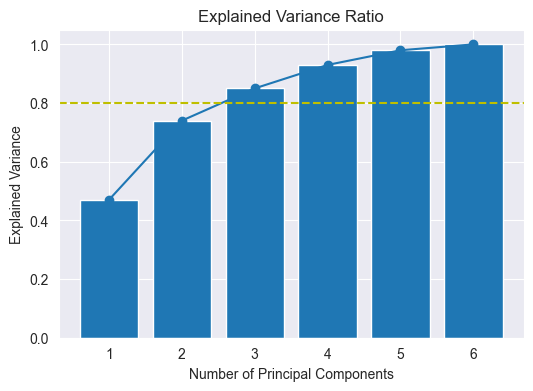

In [76]:
# Compute the covariance matrix from df
covmatrix = df.corr()

# Obtain the eigenvalues and eigenvectors from the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covmatrix)

# Sort the eigenvalues in descending order
idxs = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[:,idxs]

# Compute the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(np.round(eigenvalues/eigenvalues.sum(), 2))
print(cumulative_explained_variance_ratio[:-1])

# Plot the explained variance ratio
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio')

# Add line to the plot
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.axhline(y=0.8, color='y', linestyle='--')
plt.show()

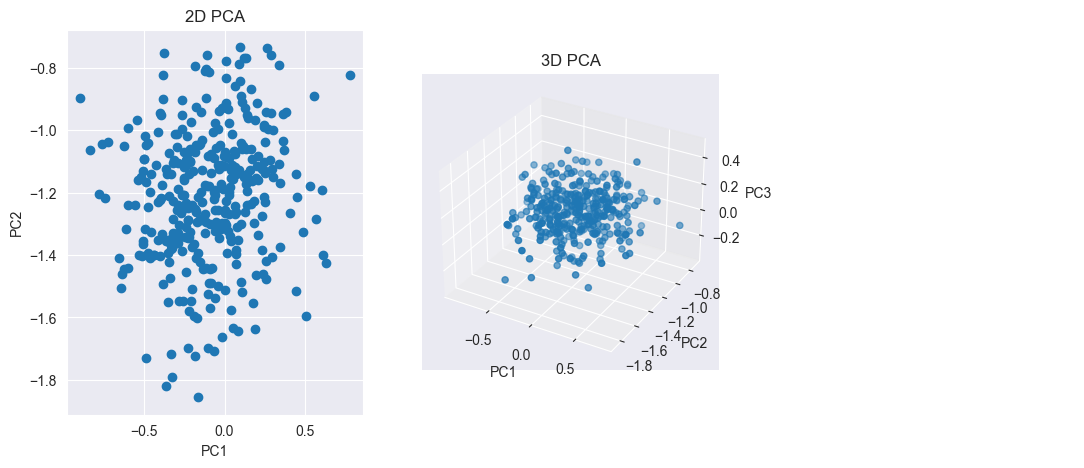

In [119]:
# Generate PCA component space (PCA scores)
pc = np.dot(covmatrix, eigenvectors)

# Get a df for the PCA scores
names = ["PC_"+str(x+1) for x in range(pc.shape[1])]
df_pca = pd.DataFrame(data=pc, columns=names)

# Transpose the matrix with 3 eigenvectors and multiply it by the original data
df_pca = np.dot(eigenvectors.T, df.T).T

# Plot the data in 2D and 3D
fig = plt.figure(figsize=(13, 5))  # Adjust the figure width as needed

# 2D plot
ax1 = fig.add_subplot(131)
ax1.scatter(df_pca[:, 0], df_pca[:, 1])
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('2D PCA')

# 3D plot
ax3 = fig.add_subplot(132, projection='3d')
ax3.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2])
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')
ax3.set_title('3D PCA')

# Empty subplot to let the third label to fit
ax2 = fig.add_subplot(133, aspect='equal')
ax2.axis('off')

plt.show()

### III Measuring the Quality of PC projections
 Each of the leading eigenvectors of V (from SVD) or PC's defines an "interesting" direction wrt the maximum variability of the Data.
 The ratio of the total variance of the Data captured by an r-projection (typically, r=2, 3) is calculated as the ratio of the sum of square of the main 'r' eigenvalues by the sum of of square of the 'p' ('p' >> 'r') eigenvalues. 

In [ ]:
r = x_values.shape[1]
var_explained = np.cumsum(s**2)/np.sum(s**2)*100;

# You can change the features you would like to display, from 0 to 3
f1=0   #Sepal lenght
f2=2   #Petal lenght

approx = []
for n in range(1,r+1):
    approximation = np.dot((u[:,:n] * s[:n]),vh[:n,:]) 
    
    approx.append(approximation)
    
    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))
    
    sns.regplot(x=approximation[:,f1],
                y=approximation[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax1)
    ax1.set(xlabel= 'Sepal lenght', 
           ylabel= 'Petal lenght',
           title= (str(n) 
                   + ' component(s) retained, ' 
                   + str(round(var_explained[n-1],2)) 
                   + '% variance'))
    

    sns.regplot(x=x_norm[:,f1],
                y=x_norm[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax2)
    ax2.set(xlabel='Sepal lenght', 
           ylabel= 'Petal lenght',
           title=' Dataset');
